# Lead Score - Case Study (X Education)

## Problem Statement
An education company named __X Education__ sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. <br>

__When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.__<br>

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. __The typical lead conversion rate at X education is around 30%.__
 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as __‘Hot Leads’__. <br>

If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.  A typical lead conversion process can be represented using the following funnel:

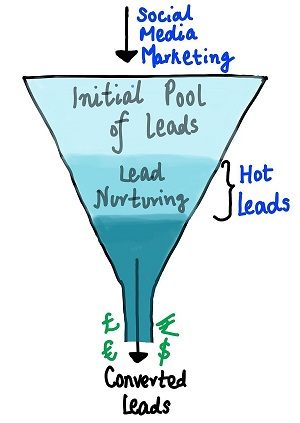

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. <br>
The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

### Data

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not.

The target variable, in this case, is the column _‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted._ You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).


### Goal


There are quite a few goals for this case study:
1.
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converd. . There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendation
 


___All the outcomes and understandings are written in <font color= #0000FF> Blue</font>___

In [3]:
# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visualization
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display customization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Data Preparation

### Data Loading

In [6]:
data = pd.read_csv('Leads.csv')
data.head(5) 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Data Inspection

In [8]:
#checking duplicates
sum(data.duplicated(subset = 'Prospect ID')) == 0
sum(data.duplicated(subset = 'Lead Number')) == 0
# No duplicate values

True

In [9]:
data.shape

(9240, 37)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0
Asymmetrique Activity Score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,18.0
Asymmetrique Profile Score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,20.0


### Data Cleaning

In [13]:
data.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [14]:
# percentage of missing values in each column, rounding it to two decimal places.
round(100 * (data.isnull().sum() / len(data.index)), 2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [15]:
# Now we will take care of null values in each column one by one.
# Lead Quality: Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead
data['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

<Axes: xlabel='Lead Quality', ylabel='count'>

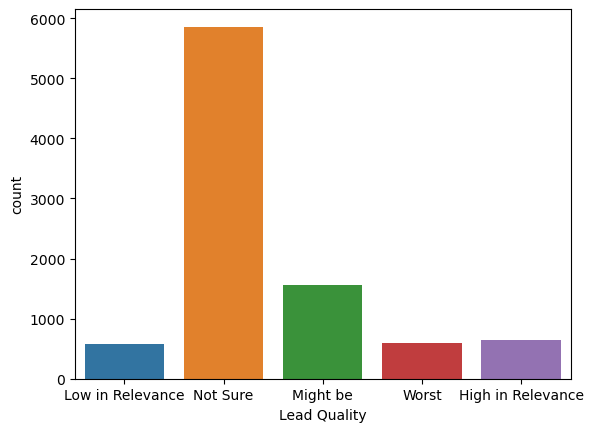

In [16]:
# As Lead quality is based on the intution of employee, so if left blank we can impute 'Not Sure' in NaN safely.
data['Lead Quality'] = data['Lead Quality'].replace(np.nan, 'Not Sure')
sns.countplot(data=data, x='Lead Quality')

In [17]:
# Asymmetrique Activity Index  |
# Asymmetrique Profile Index   \   An index and score assigned to each customer
# Asymmetrique Activity Score  |    based on their activity and their profile
# Asymmetrique Profile Score   \


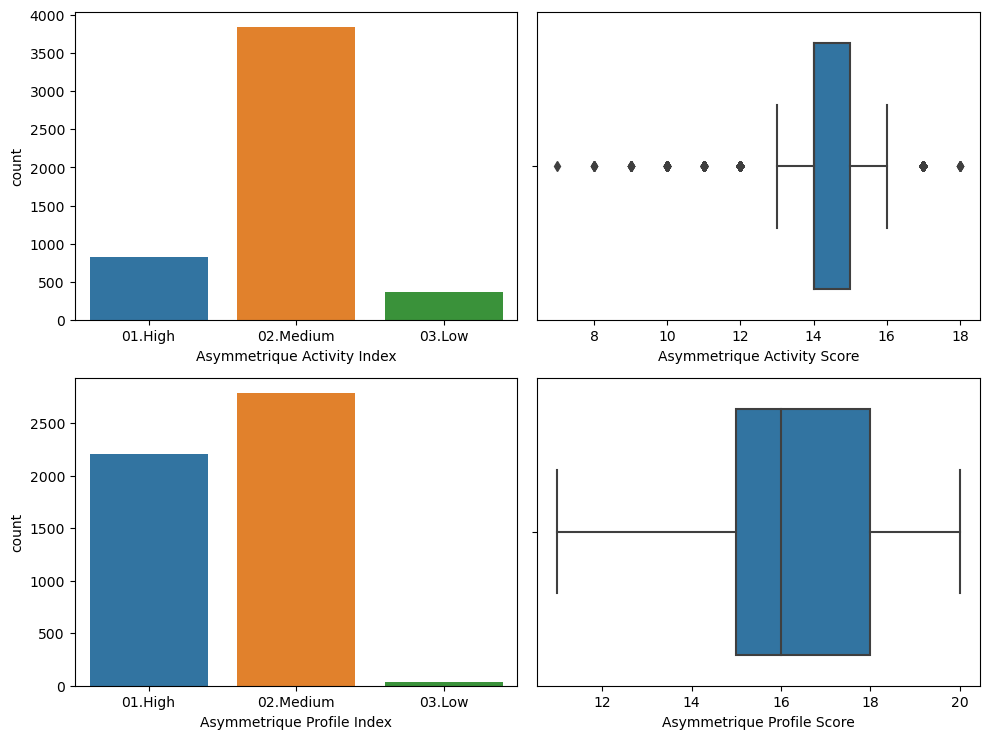

In [18]:
# Clean column names
data.columns = data.columns.str.strip()

# Convert columns to appropriate types
data['Asymmetrique Activity Index'] = data['Asymmetrique Activity Index'].astype('category')
data['Asymmetrique Profile Index'] = data['Asymmetrique Profile Index'].astype('category')
data['Asymmetrique Activity Score'] = pd.to_numeric(data['Asymmetrique Activity Score'], errors='coerce')
data['Asymmetrique Profile Score'] = pd.to_numeric(data['Asymmetrique Profile Score'], errors='coerce')

# Drop rows with missing values
data.dropna(subset=['Asymmetrique Activity Index', 'Asymmetrique Activity Score',
                    'Asymmetrique Profile Index', 'Asymmetrique Profile Score'], inplace=True)

fig, axs = plt.subplots(2, 2, figsize=(10, 7.5))

sns.countplot(data=data, x='Asymmetrique Activity Index', ax=axs[0, 0])
sns.boxplot(data=data, x='Asymmetrique Activity Score', ax=axs[0, 1])
sns.countplot(data=data, x='Asymmetrique Profile Index', ax=axs[1, 0])
sns.boxplot(data=data, x='Asymmetrique Profile Score', ax=axs[1, 1])

plt.tight_layout()
plt.show()


In [19]:
# There is too much variation in these parameters so its not reliable to impute any value in it. 
# 45% null values means we need to drop these columns.
data = data.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [20]:
# City
data.City.value_counts()

Mumbai                         1749
Select                         1239
Thane & Outskirts               415
Other Cities                    379
Other Cities of Maharashtra     252
Other Metro Cities              188
Tier II Cities                   35
Name: City, dtype: int64

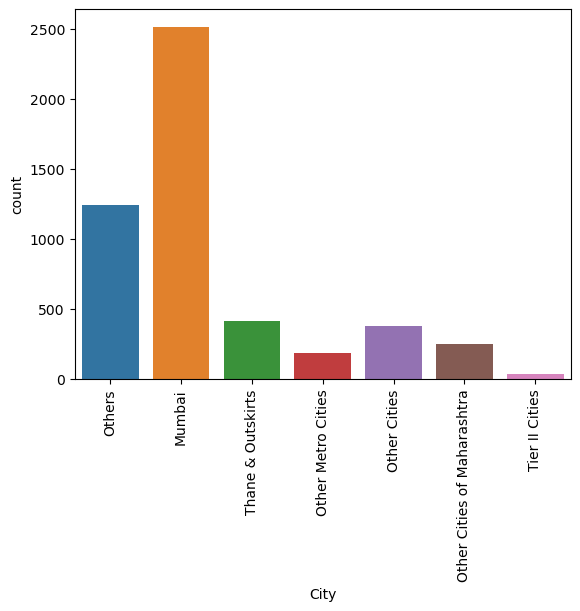

In [21]:
# Around 60% of the data is Mumbai so we can impute Mumbai in the missing values.
data['City'] = data['City'].replace({np.nan: 'Mumbai', 'Select': 'Others'})
sns.countplot(data=data, x='City')
plt.xticks(rotation=90)
plt.show()

In [22]:
# Specialization
data.Specialization.value_counts()

Select                               1102
Finance Management                    502
Human Resource Management             456
Marketing Management                  438
Operations Management                 270
Business Administration               231
Supply Chain Management               211
IT Projects Management                198
Banking, Investment And Insurance     191
Travel and Tourism                    103
Media and Advertising                 100
International Business                 90
Healthcare Management                  81
E-COMMERCE                             60
Hospitality Management                 59
Retail Management                      53
Rural and Agribusiness                 42
E-Business                             34
Services Excellence                    29
Name: Specialization, dtype: int64

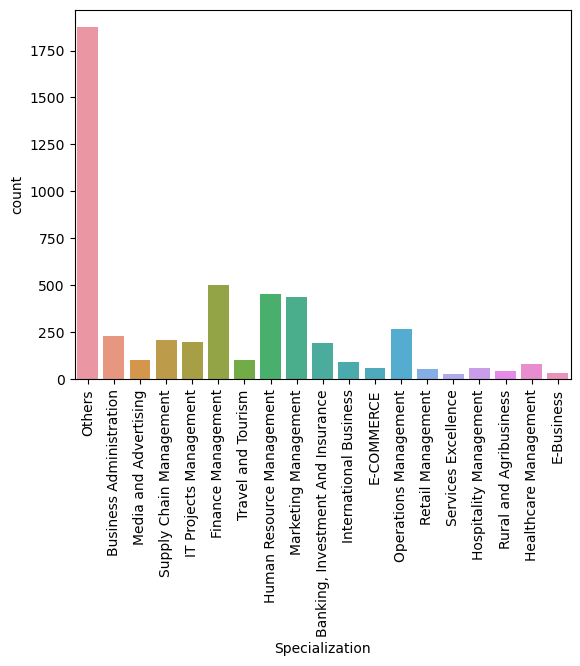

In [23]:
# It maybe the case that lead has not entered any specialization if his/her option is not available on the list,
#  may not have any specialization or is a student.
# Hence we can make a category "Others" for missing values. 
# Replacing both NaN and 'Select' with 'Others'
data['Specialization'] = data['Specialization'].replace([np.nan, 'Select'], 'Others')

# Plotting the countplot with rotated x-axis labels
sns.countplot(data=data, x='Specialization')
plt.xticks(rotation=90)
plt.show()

<font color= #0000FF>____We see that specialization with Management in them have higher number of leads as well as leads converted. So this is definitely a significant variable____</font>

In [25]:
# Tags
data.Tags.value_counts()

Will revert after reading the email                  1129
Ringing                                               630
Interested in other courses                           349
Already a student                                     232
Closed by Horizzon                                    215
switched off                                          126
Lost to EINS                                          105
Busy                                                   94
Not doing further education                            82
Interested  in full time MBA                           73
Graduation in progress                                 66
invalid number                                         42
Diploma holder (Not Eligible)                          26
wrong number given                                     25
opp hangup                                             21
number not provided                                    16
in touch with EINS                                      8
Still Thinking

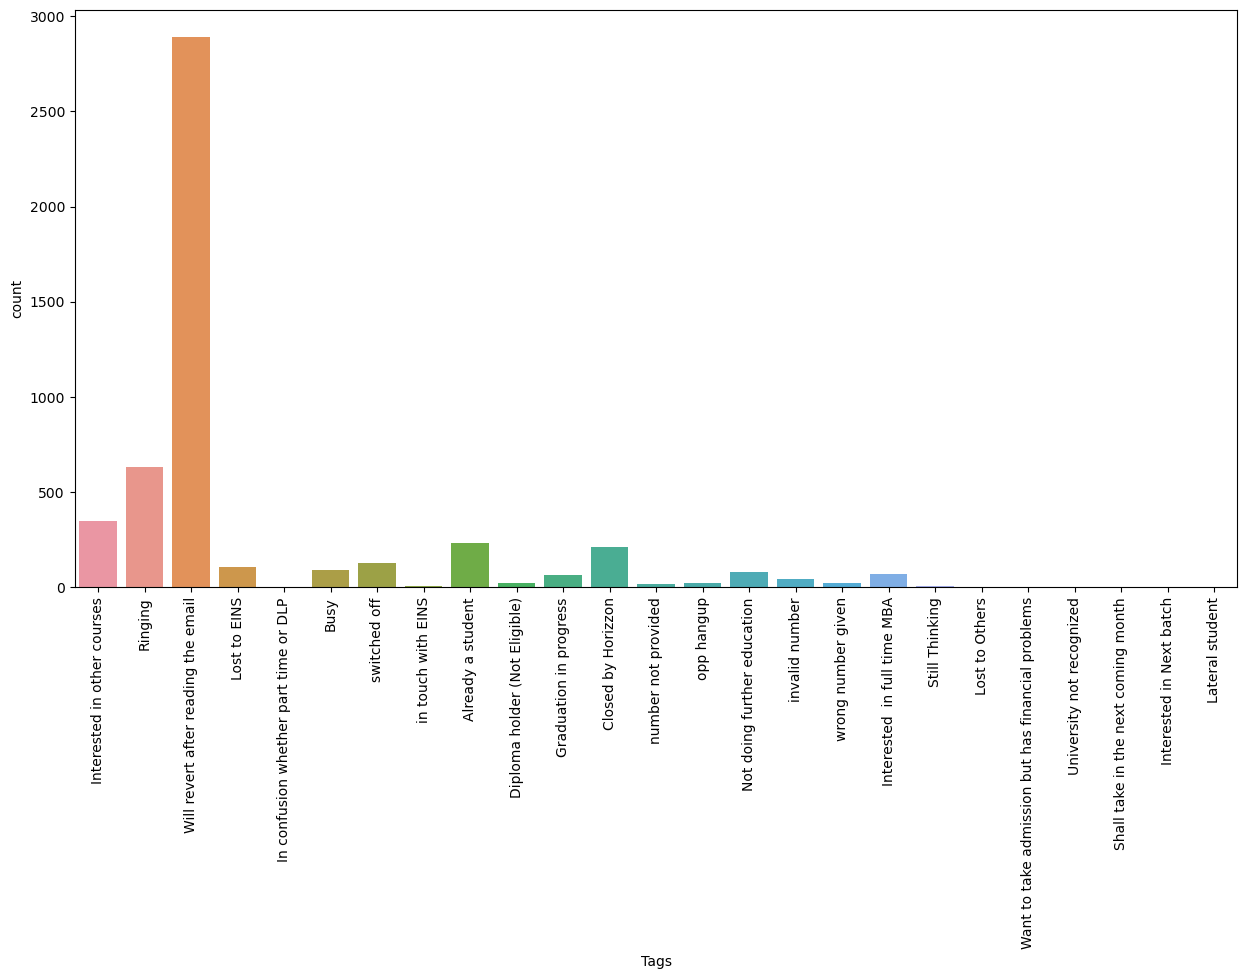

In [26]:
# Blanks in the tag column may be imputed by 'Will revert after reading the email'.
data['Tags'] = data['Tags'].replace(np.nan, 'Will revert after reading the email')
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(data = data, x = 'Tags')
plt.xticks(rotation = 90)
plt.show()

In [27]:
# What matters most to you in choosing a course
data['What matters most to you in choosing a course'].value_counts()
# Blanks in the this column may be imputed by 'Better Career Prospects'.

Better Career Prospects      3576
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

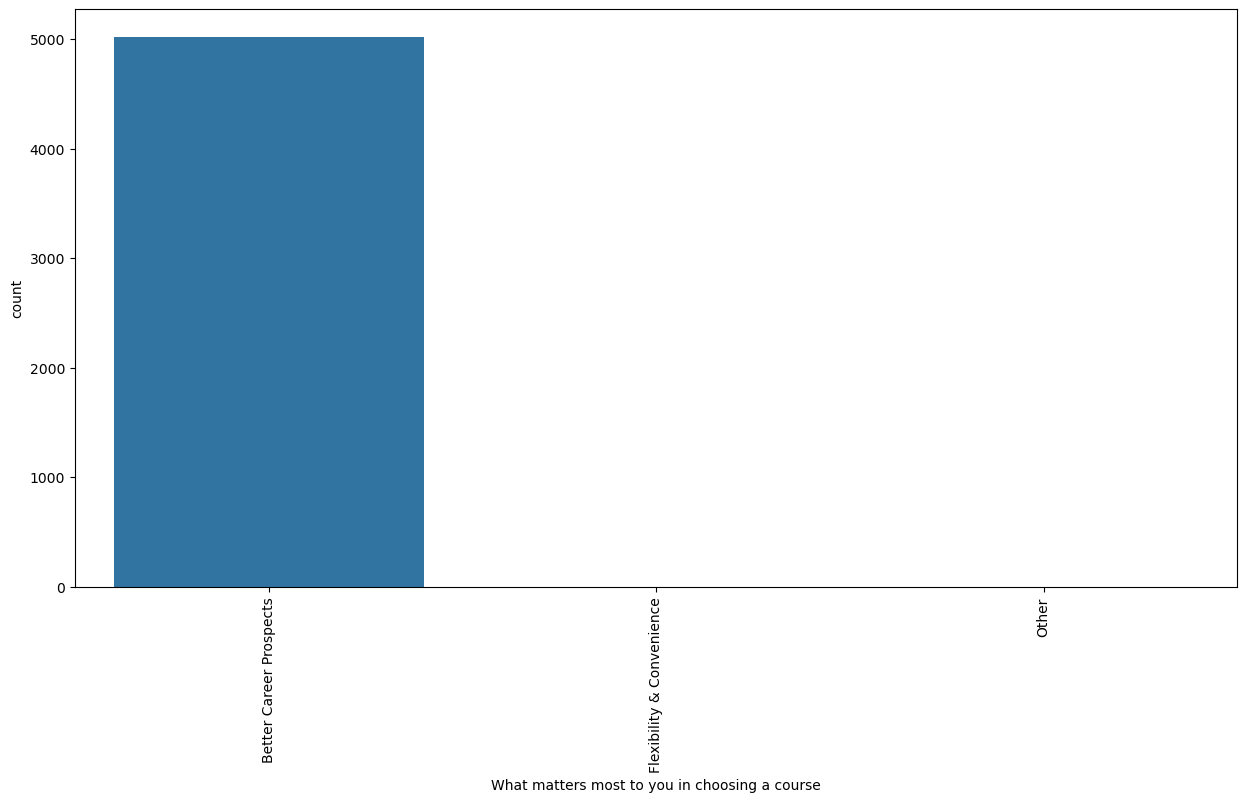

In [28]:
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(data = data, x = 'What matters most to you in choosing a course')
plt.xticks(rotation = 90)
plt.show()

In [29]:
# Occupation
data['What is your current occupation'].value_counts()

Unemployed              3078
Working Professional     393
Student                   97
Businessman                6
Other                      5
Housewife                  3
Name: What is your current occupation, dtype: int64

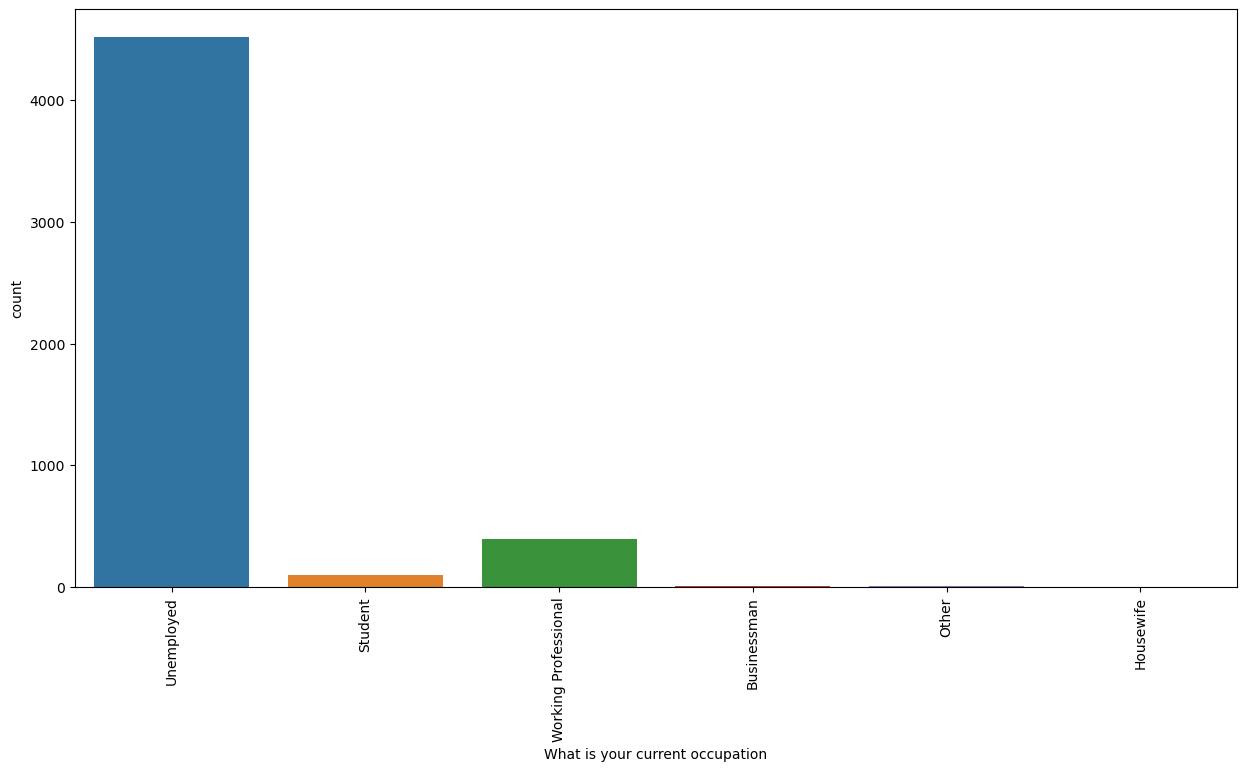

In [30]:
# 86% entries are of Unemployed so we can impute "Unemployed" in it.
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, 'Unemployed')
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(data = data, x = 'What is your current occupation')
plt.xticks(rotation = 90)
plt.show()

<font color= #0000FF>____Working Professionals going for the course have high chances of joining it.Unemployed leads are the most in terms of Absolute numbers.____</font>

In [32]:
# Country
data['Country'].value_counts()

India                   3567
United States             44
United Arab Emirates      26
Singapore                 16
Saudi Arabia              11
Australia                  7
Hong Kong                  6
United Kingdom             5
Bahrain                    5
Qatar                      4
Kuwait                     4
France                     4
South Africa               3
Canada                     3
Nigeria                    2
Bangladesh                 2
unknown                    2
Germany                    2
Philippines                2
China                      2
Sweden                     2
Ghana                      2
Oman                       2
Netherlands                1
Russia                     1
Italy                      1
Sri Lanka                  1
Switzerland                1
Belgium                    1
Denmark                    1
Vietnam                    1
Indonesia                  1
Asia/Pacific Region        1
Name: Country, dtype: int64

In [33]:
# Country is India for most values so let's impute the same in missing values.
data['Country'] = data['Country'].replace(np.nan, 'India')

In [34]:
data['Lead Profile'].value_counts()

Select                         2185
Potential Lead                 1063
Other Leads                     208
Student of SomeSchool            88
Lateral Student                  20
Dual Specialization Student      14
Name: Lead Profile, dtype: int64

In [35]:
# Replacing both NaN and 'Select' with 'Others'
data['Lead Profile'] = data['Lead Profile'].replace([np.nan, 'Select'], 'Others')

In [36]:
data['How did you hear about X Education'].value_counts()

Select                   2748
Online Search             445
Word Of Mouth             193
Student of SomeSchool     162
Other                     118
Multiple Sources           86
Advertisements             40
Social Media               39
SMS                        12
Email                      11
Name: How did you hear about X Education, dtype: int64

In [37]:
# Replacing both NaN and 'Select' with 'Others'
data['How did you hear about X Education'] = data['How did you hear about X Education'].replace([np.nan, 'Select'], 'Others')

In [38]:
# Replacing NaN values with 0 in 'Page Views Per Visit'
data['Page Views Per Visit'] = data['Page Views Per Visit'].fillna(0)                              

In [39]:
data['TotalVisits'] = data['TotalVisits'].fillna(0)     

In [40]:
data['Last Activity'].value_counts()

Email Opened                    1990
SMS Sent                        1259
Olark Chat Conversation          579
Page Visited on Website          328
Converted to Lead                239
Email Link Clicked               169
Email Bounced                    156
Form Submitted on Website         86
Unreachable                       81
Unsubscribed                      34
Had a Phone Conversation          28
View in browser link Clicked       4
Approached upfront                 4
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [41]:
data['Last Activity'] = data['Last Activity'].replace([np.nan], 'Others')

In [42]:
data['Lead Source'].value_counts()   

Google               1643
Direct Traffic       1276
Olark Chat            922
Organic Search        632
Reference             264
Referral Sites        119
Welingak Website       75
Facebook               54
google                  5
Click2call              2
Press_Release           2
Live Chat               2
Social Media            2
blog                    1
WeLearn                 1
bing                    1
Pay per Click Ads       1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [43]:
data['Lead Source'] = data['Lead Source'].replace([np.nan], 'Others')

In [44]:
round(100*(data.isnull().sum()/len(data.index)), 2).sort_values(ascending = False)

Prospect ID                                      0.0
Magazine                                         0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
City                                             0.0
Lead Profile                                     0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Lead Quality                                     0.0
Tags                                             0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Search                                           0.0
Lead Number                                      0.0
What matters most to you in choosing a course 

# Exploratory Data Analytics

## Univariate & Bivariate Analysis

In [47]:
# Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

37.992831541218635

### Lead Origin

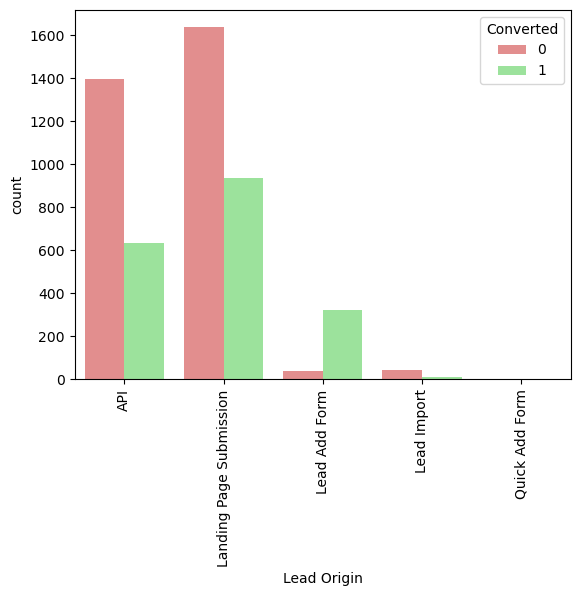

In [49]:
# Define a color palette
custom_palette = {0: 'lightcoral', 1: 'lightgreen'}

# Create the countplot with custom colors
sns.countplot(x="Lead Origin", hue="Converted", data=data, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()

#### Inference
1. API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
2. Lead Add Form has more than 90% conversion rate but count of lead are not very high.
3. Lead Import are very less in count.<br>


<font color= #0000FF>____To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.____</font>

### Lead Source

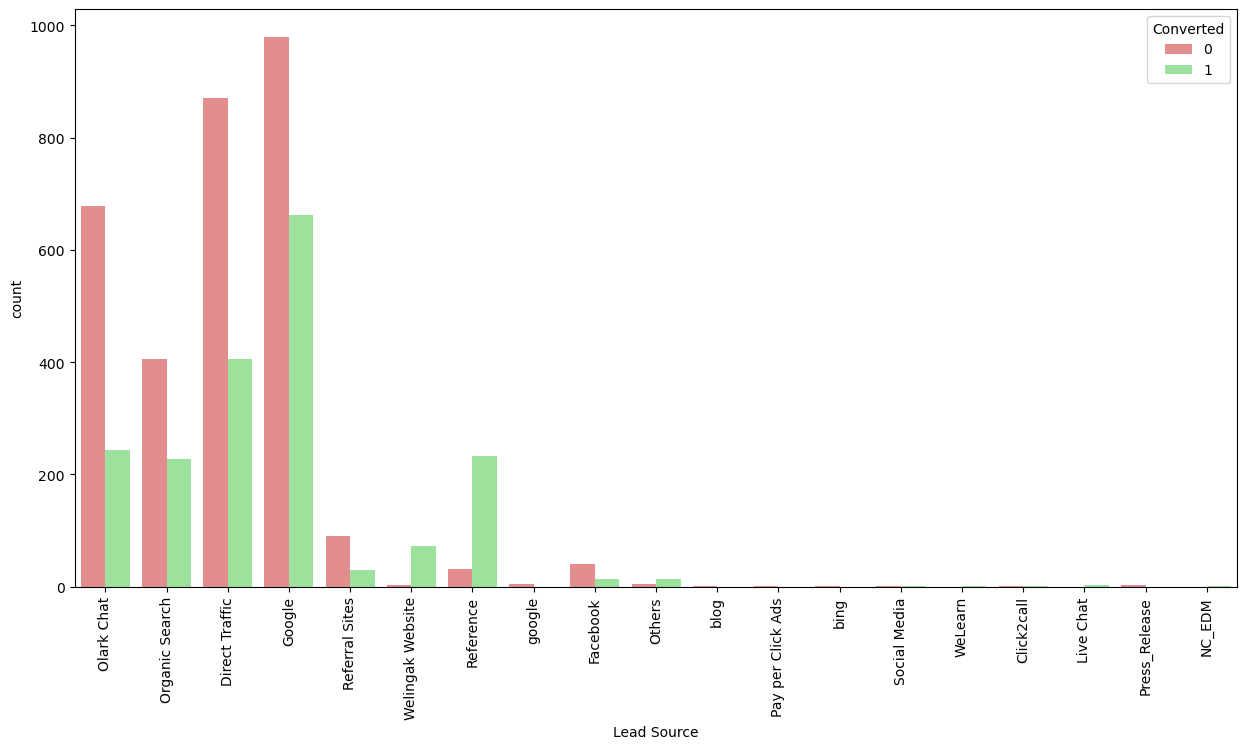

In [52]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = data,palette=custom_palette)
plt.xticks(rotation = 90)
plt.show()

In [53]:
data['Lead Source'] = data['Lead Source'].replace(['google'], 'Google')
data['Lead Source'] = data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

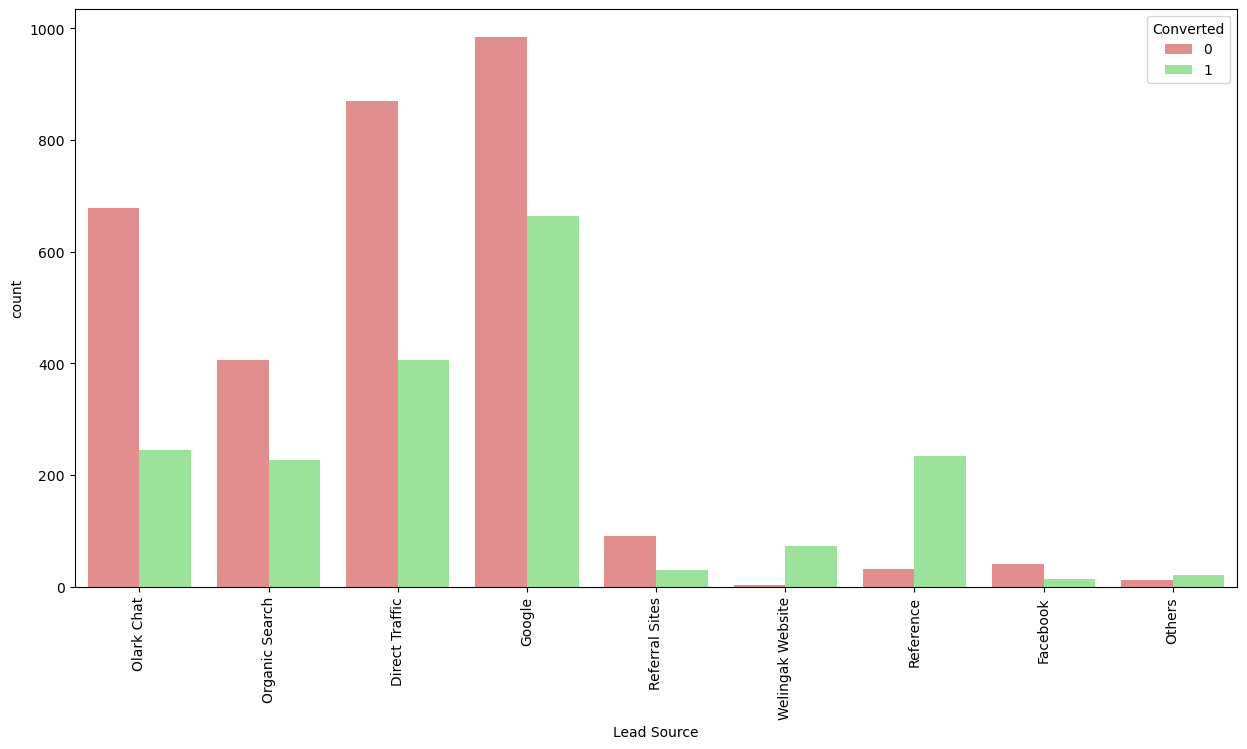

In [54]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = data, palette=custom_palette)
plt.xticks(rotation = 90)
plt.show()

#### Inference
1. Google and Direct traffic generates maximum number of leads.
2. Conversion Rate of reference leads and leads through welingak website is high.

<font color= #0000FF>____To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google  leads and generate more leads from reference and welingak website.____</font>

### Do Not Email & Do Not Call

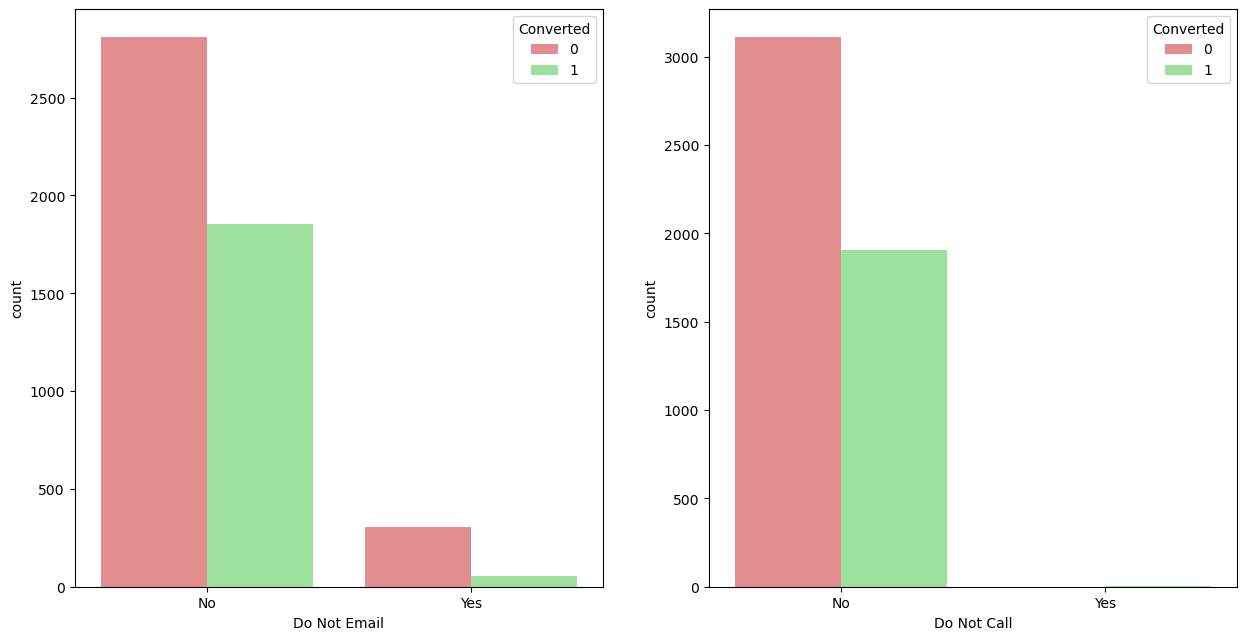

In [57]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = data, ax = axs[0],palette=custom_palette)
sns.countplot(x = "Do Not Call", hue = "Converted", data = data, ax = axs[1],palette=custom_palette)
plt.show()

### Total Visits

In [59]:
data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    5022.000000
mean        3.493230
std         4.188576
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.790000
max       141.000000
Name: TotalVisits, dtype: float64

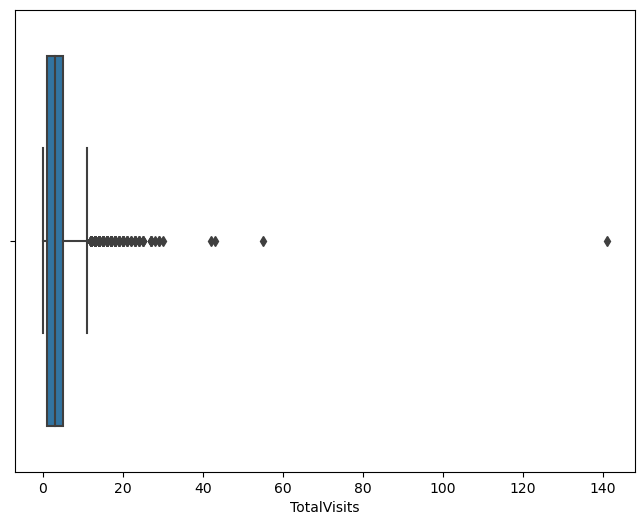

In [60]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['TotalVisits'], orient='h')
plt.show()

As we can see there are a number of outliers in the data.
We will cap the outliers to 95% value for analysis.

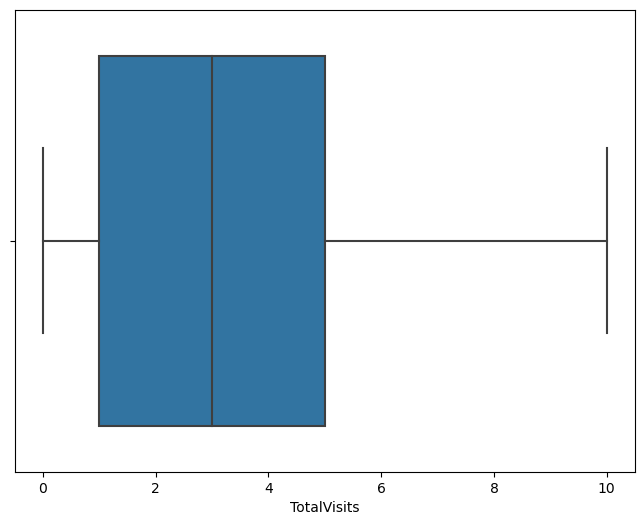

In [62]:
percentiles = data['TotalVisits'].quantile([0.05,0.95]).values
data['TotalVisits'][data['TotalVisits'] <= percentiles[0]] = percentiles[0]
data['TotalVisits'][data['TotalVisits'] >= percentiles[1]] = percentiles[1]
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['TotalVisits'], orient='h')
plt.show()

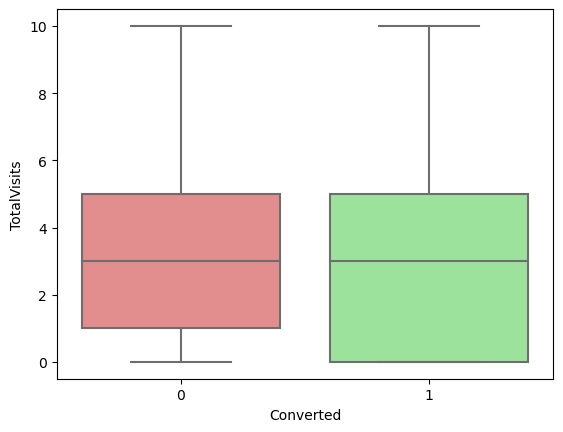

In [63]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data,palette=custom_palette)
plt.show()

#### Inference
1. Median for converted and not converted leads are the same.

__Nothing conclusive can be said on the basis of Total Visits.__

### Total time spent on website

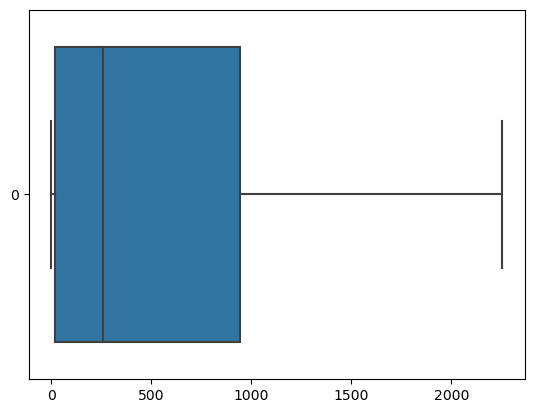

In [66]:
sns.boxplot(data['Total Time Spent on Website'], orient='h')
plt.show()

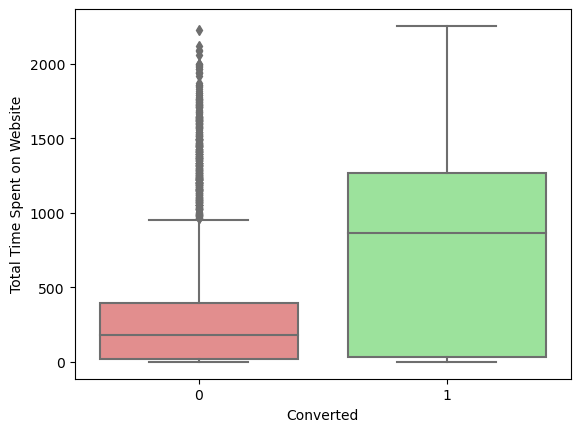

In [67]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = data,palette=custom_palette)
plt.show()

#### Inference
<font color= #0000FF>___Leads spending more time on the website are more likely to be converted.
_Website should be made more engaging to make leads spend more time.____</font>

### Page views per visit

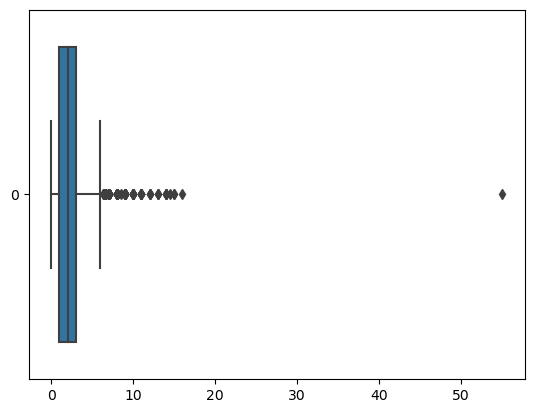

In [70]:
sns.boxplot(data['Page Views Per Visit'], orient='h')
plt.show()

As we can see there are a number of outliers in the data.
We will cap the outliers to 95% value for analysis.

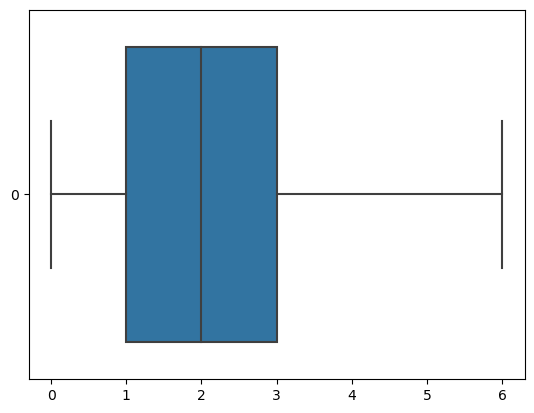

In [72]:
percentiles = data['Page Views Per Visit'].quantile([0.05,0.95]).values
data['Page Views Per Visit'][data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
data['Page Views Per Visit'][data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]
sns.boxplot(data['Page Views Per Visit'], orient='h')
plt.show()

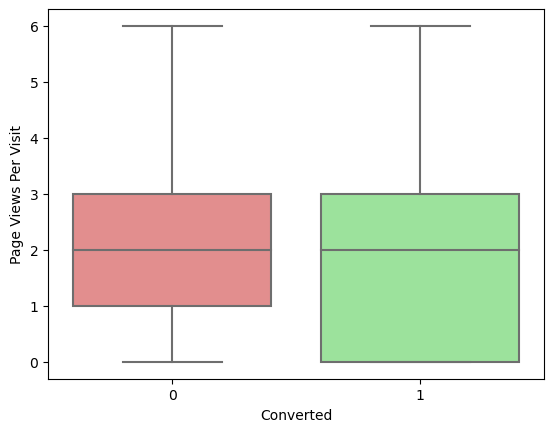

In [73]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = data,palette=custom_palette)
plt.show()

#### Inference

<font color= #0000FF>____Median for converted and unconverted leads is the same. Nothing can be said specifically for lead conversion from Page Views Per Visit____</font>

### Last Activity

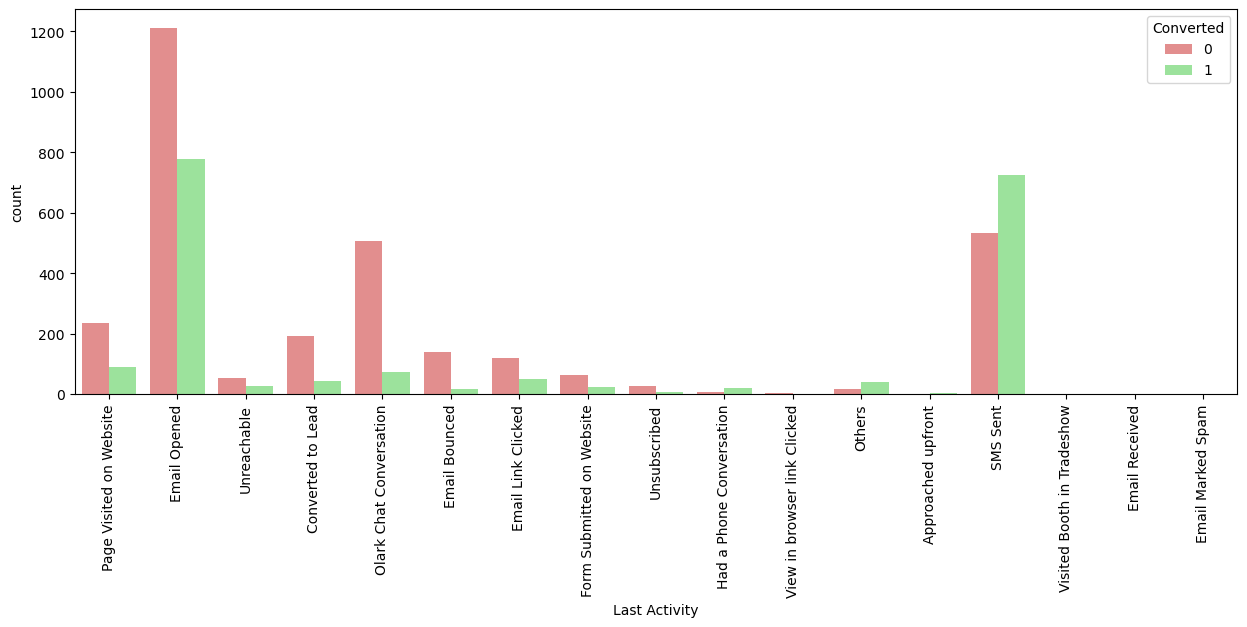

In [76]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = data,palette=custom_palette)
plt.xticks(rotation = 90)
plt.show()

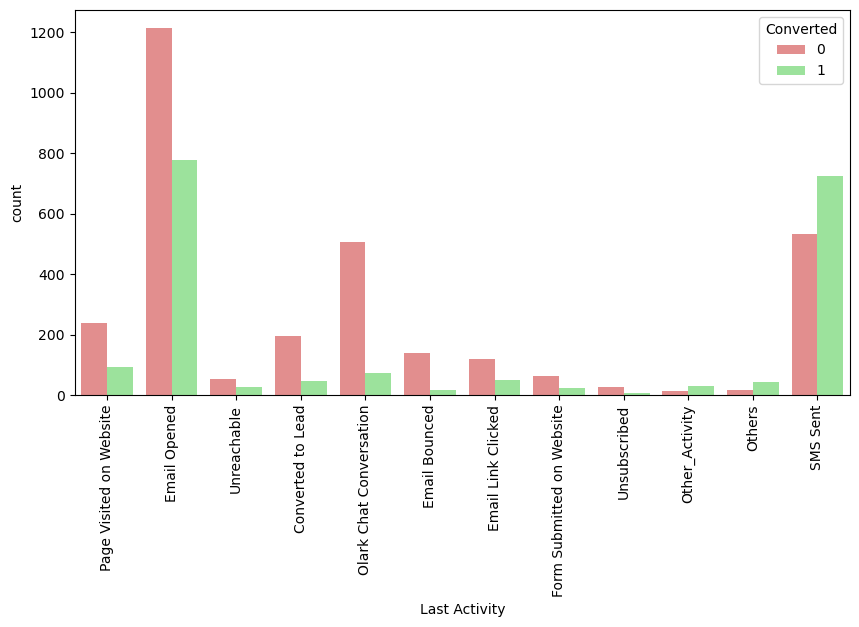

In [77]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
data['Last Activity'] = data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = data,palette=custom_palette)
plt.xticks(rotation = 90)
plt.show()

#### Inference
<font color= #0000FF>____Most of the lead have their Email opened as their last activity.
2. Conversion rate for leads with last activity as SMS Sent is almost 60%.____</font>

### Specialization

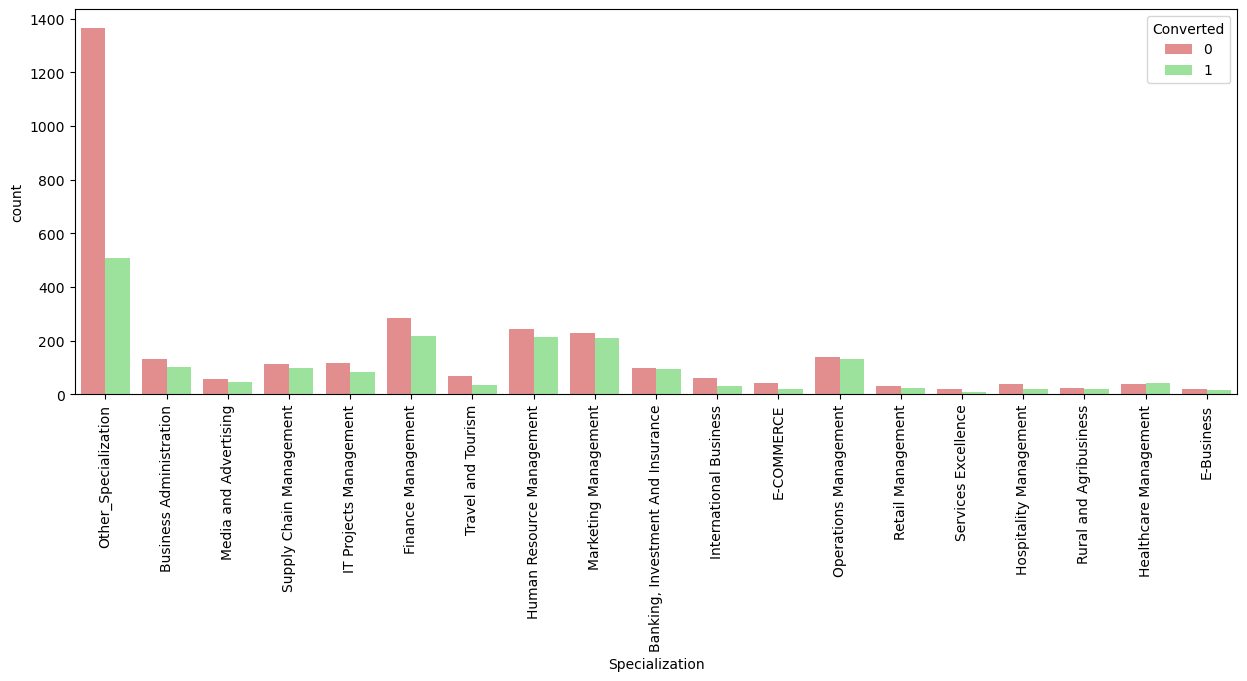

In [80]:
data['Specialization'] = data['Specialization'].replace(['Others'], 'Other_Specialization')
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Specialization", hue = "Converted", data = data,palette=custom_palette)
plt.xticks(rotation = 90)
plt.show()

#### Inference

<font color= #0000FF>____Focus should be more on the Specialization with high conversion rate.____</font>

### Occupation

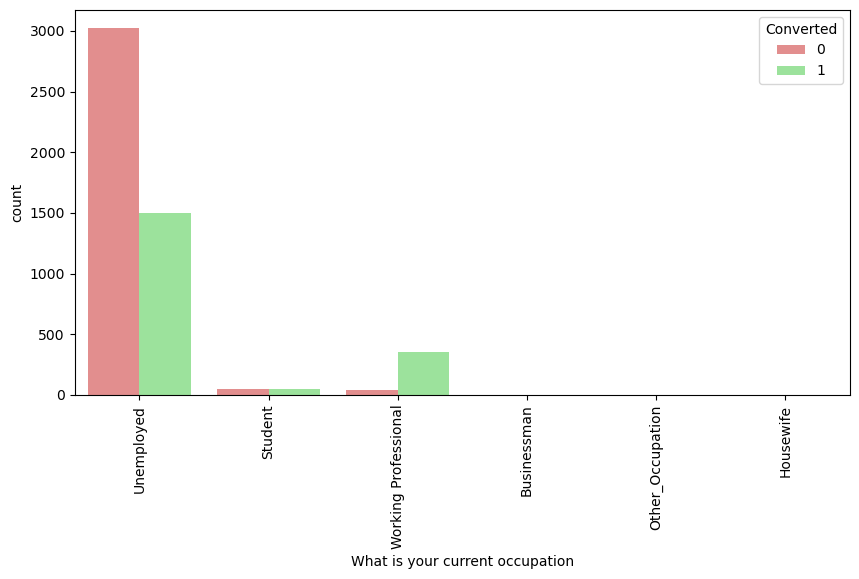

In [83]:
data['What is your current occupation'] = data['What is your current occupation'].replace(['Other'], 'Other_Occupation')
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = data,palette=custom_palette)
plt.xticks(rotation = 90)
plt.show()

 ### Inference
<font color= #0000FF>____Working Professionals going for the course have high chances of joining it. Unemployed leads are the most in numbers but has around 30-35% conversion rate.____</font>

### What matters most to you in choosing a course

In [86]:
data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      5020
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

### Inference
Most entries are 'Better Career Prospects'.
No Inference can be drawn with this parameter.

### Search

In [89]:
data.Search.value_counts()

No     5015
Yes       7
Name: Search, dtype: int64

### Inference
Most entries are 'No'.
No Inference can be drawn with this parameter.

### Magazine

In [92]:
data.Magazine.value_counts()

No    5022
Name: Magazine, dtype: int64

### Inference
Most entries are 'No'.
No Inference can be drawn with this parameter.

### Newspaper Article

In [95]:
data['Newspaper Article'].value_counts()

No     5021
Yes       1
Name: Newspaper Article, dtype: int64

### Inference
Most entries are 'No'.
No Inference can be drawn with this parameter.

### X Education Forums

In [98]:
data['X Education Forums'].value_counts()

No    5022
Name: X Education Forums, dtype: int64

### Inference
Most entries are 'No'.
No Inference can be drawn with this parameter.

### Newspaper

In [101]:
data['Newspaper'].value_counts()

No    5022
Name: Newspaper, dtype: int64

### Inference
Most entries are 'No'.
No Inference can be drawn with this parameter.

### Digital Advertisement

In [104]:
data['Digital Advertisement'].value_counts()

No     5020
Yes       2
Name: Digital Advertisement, dtype: int64

### Inference
Most entries are 'No'.
No Inference can be drawn with this parameter.

### Through Recommendations

In [107]:
data['Through Recommendations'].value_counts()

No     5019
Yes       3
Name: Through Recommendations, dtype: int64

### Inference
Most entries are 'No'.
No Inference can be drawn with this parameter.

### Receive More Updates About Our Courses

In [110]:
data['Receive More Updates About Our Courses'].value_counts()

No    5022
Name: Receive More Updates About Our Courses, dtype: int64

### Inference
Most entries are 'No'.
No Inference can be drawn with this parameter.

#### Tags

In [113]:
data.Tags.value_counts()

Will revert after reading the email                  2888
Ringing                                               630
Interested in other courses                           349
Already a student                                     232
Closed by Horizzon                                    215
switched off                                          126
Lost to EINS                                          105
Busy                                                   94
Not doing further education                            82
Interested  in full time MBA                           73
Graduation in progress                                 66
invalid number                                         42
Diploma holder (Not Eligible)                          26
wrong number given                                     25
opp hangup                                             21
number not provided                                    16
in touch with EINS                                      8
Still Thinking

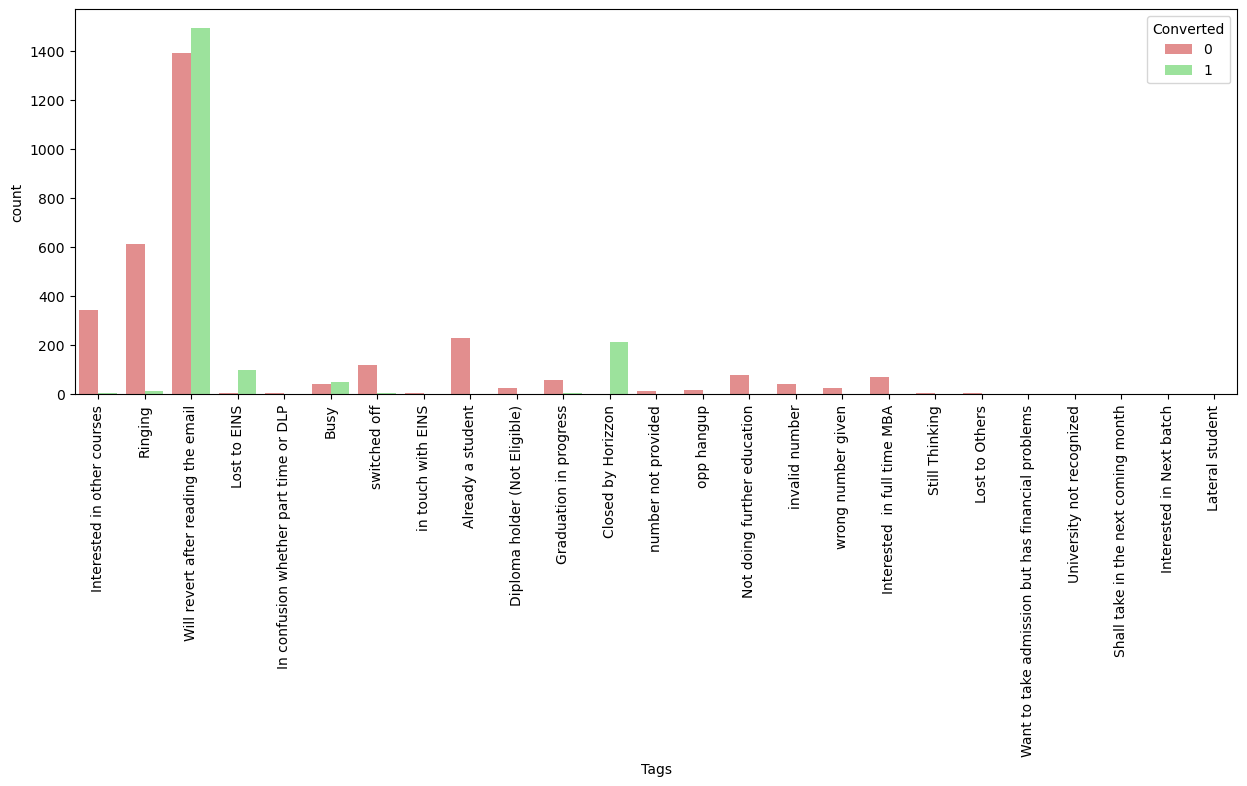

In [114]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Tags", hue = "Converted", data = data, palette=custom_palette)
plt.xticks(rotation = 90)
plt.show()

In [115]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
data['Tags'] = data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

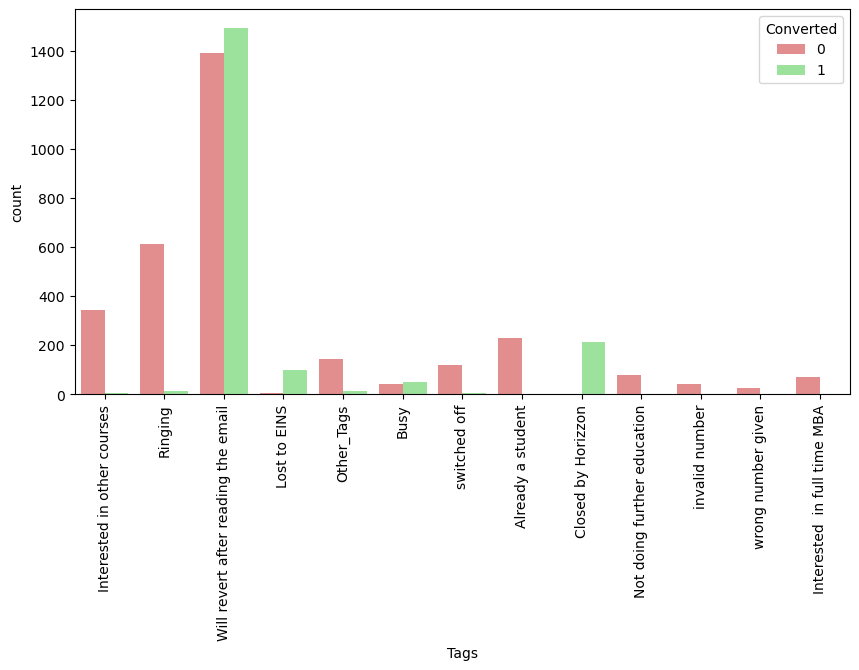

In [116]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Tags", hue = "Converted", data = data, palette=custom_palette)
plt.xticks(rotation = 90)
plt.show()

### Inference
<font color= #0000FF>____People choose to take up the course after reading the email.____</font> 

 ### Lead Quality

In [119]:
data['Lead Quality'].value_counts()

Not Sure             3178
Might be              848
High in Relevance     375
Low in Relevance      352
Worst                 269
Name: Lead Quality, dtype: int64

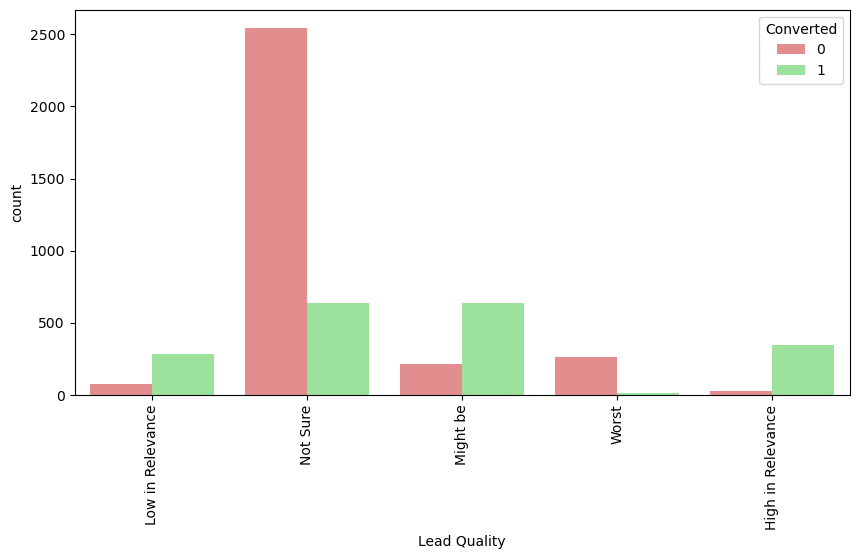

In [120]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Lead Quality", hue = "Converted", data = data, palette=custom_palette)
plt.xticks(rotation = 90)
plt.show()

### Update me on Supply Chain Content

In [122]:
data['Update me on Supply Chain Content'].value_counts()

No    5022
Name: Update me on Supply Chain Content, dtype: int64

### Inference
Most entries are 'No'.
No Inference can be drawn with this parameter.

### Get updates on DM Content

In [125]:
data['Get updates on DM Content'].value_counts()

No    5022
Name: Get updates on DM Content, dtype: int64

### Inference
Most entries are 'No'.
No Inference can be drawn with this parameter.

### I agree to pay the amount through cheque

In [128]:
data['I agree to pay the amount through cheque'].value_counts()

No    5022
Name: I agree to pay the amount through cheque, dtype: int64

### Inference
Most entries are 'No'.
No Inference can be drawn with this parameter.

### A free copy of Mastering The Interview

In [131]:
data['A free copy of Mastering The Interview'].value_counts()

No     3486
Yes    1536
Name: A free copy of Mastering The Interview, dtype: int64

### Inference
Most entries are 'No'.
No Inference can be drawn with this parameter.

### City

In [134]:
data.City.value_counts()

Mumbai                         2514
Others                         1239
Thane & Outskirts               415
Other Cities                    379
Other Cities of Maharashtra     252
Other Metro Cities              188
Tier II Cities                   35
Name: City, dtype: int64

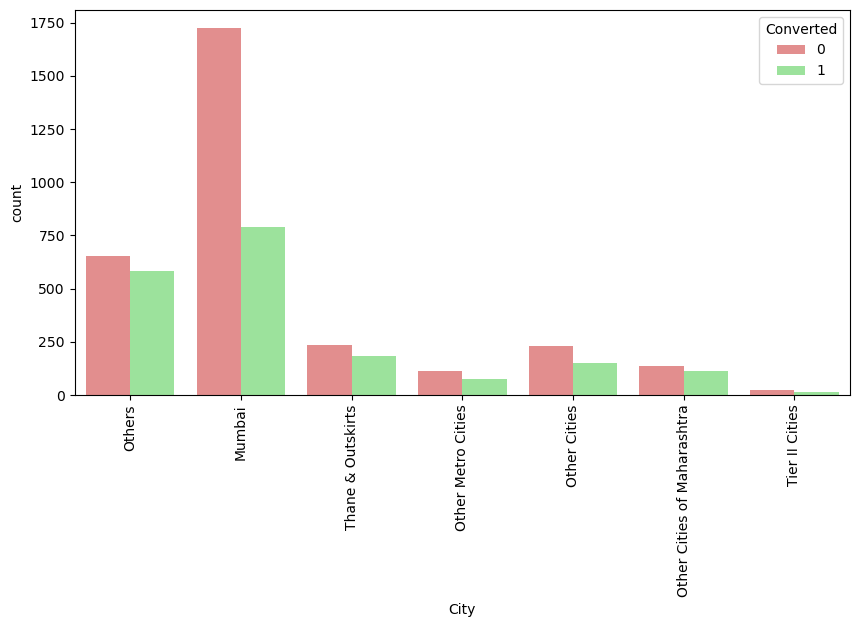

In [135]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "City", hue = "Converted", data = data, palette=custom_palette)
plt.xticks(rotation = 90)
plt.show()

### Inference
<font color= #0000FF>____Most leads are from mumbai with around 30% conversion rate____</font>

### Last Notable Activity

In [138]:
data['Last Notable Activity'].value_counts()

Modified                    2190
Email Opened                1562
SMS Sent                     821
Page Visited on Website      156
Email Link Clicked           101
Olark Chat Conversation       98
Email Bounced                 31
Unsubscribed                  24
Unreachable                   23
Had a Phone Conversation      12
Email Marked Spam              2
Approached upfront             1
Email Received                 1
Name: Last Notable Activity, dtype: int64

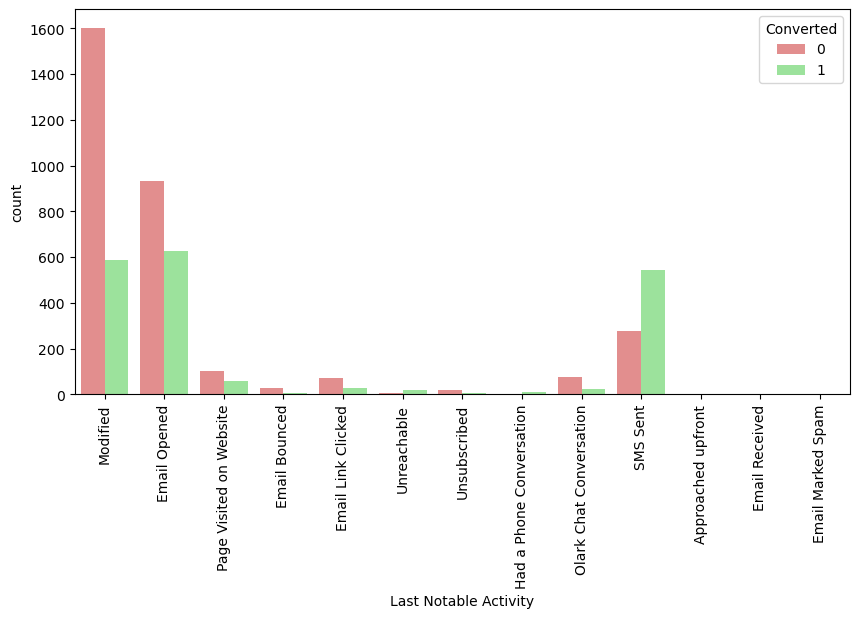

In [139]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = data, palette=custom_palette)
plt.xticks(rotation = 90)
plt.show()

## Results

<font color= #0000FF>____Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis____</font>

In [141]:
data = data.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [142]:
data.shape

(5022, 18)

In [143]:
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Tags,Lead Quality,Lead Profile,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Others,Unemployed,Interested in other courses,Low in Relevance,Others,Others,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Other_Specialization,Others,Unemployed,Ringing,Not Sure,Others,Others,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Others,Student,Will revert after reading the email,Might be,Potential Lead,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Ringing,Not Sure,Others,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Other,Unemployed,Will revert after reading the email,Might be,Others,Mumbai,Modified


### Data Preparation
#### Converting some binary variables (Yes/No) to 1/0

In [145]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [147]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Others,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [148]:
# Adding the results to the master dataframe
data = pd.concat([data, dummy1], axis=1)
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Tags,Lead Quality,Lead Profile,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Others,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Others,Unemployed,Interested in other courses,Low in Relevance,Others,Others,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Other_Specialization,Others,Unemployed,Ringing,Not Sure,Others,Others,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Others,Student,Will revert after reading the email,Might be,Potential Lead,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Ringing,Not 

In [149]:
data = data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','How did you hear about X Education','Lead Profile','City','Last Notable Activity'], axis = 1)

In [150]:
data.head(2)

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Others,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [151]:
data.shape

(5022, 87)

### Multivariate Analysis

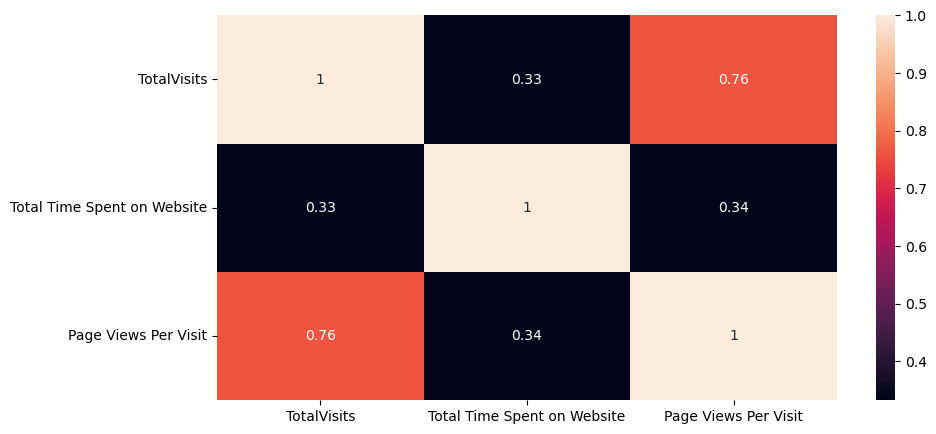

In [153]:
# Checking Correlation among variables
plt.figure(figsize=(10,5))
sns.heatmap(data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].corr(), annot = True)
plt.show()

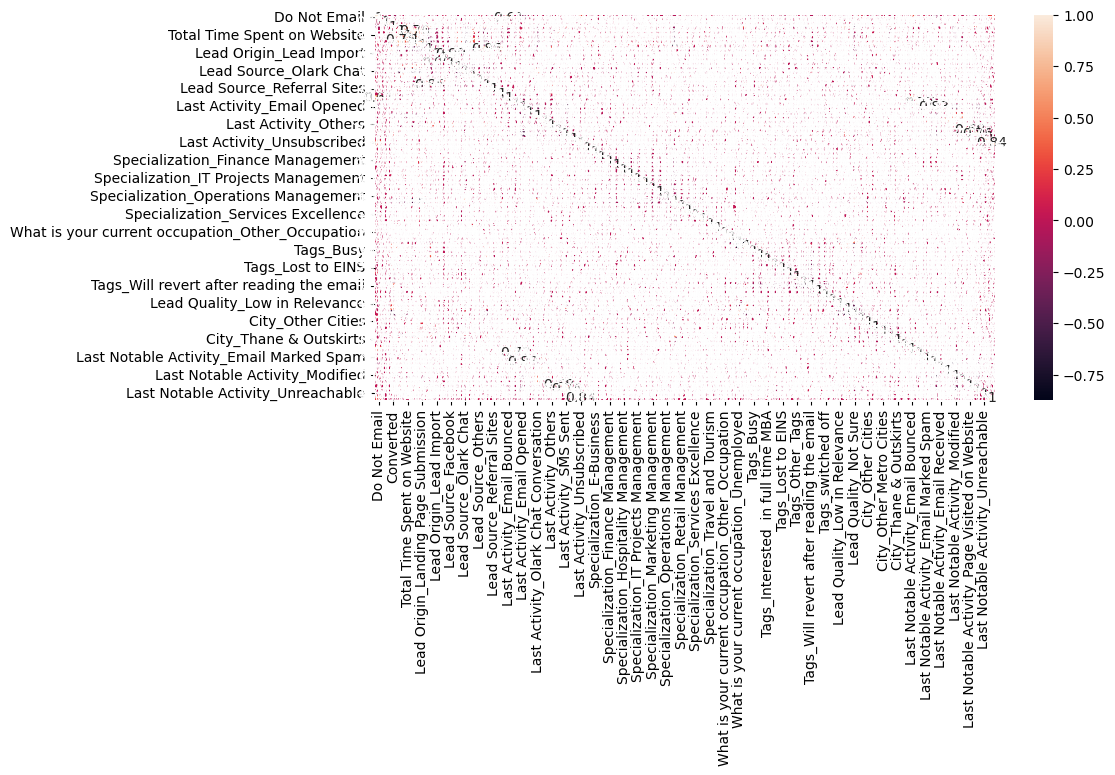

In [154]:
# Checking Correlation among variables
plt.figure(figsize=(10,5))

# Drop the 'Prospect ID' column and compute the correlation matrix
correlation_matrix = data.drop(columns=['Prospect ID']).corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [155]:
from sklearn.model_selection import train_test_split
X = data.drop(["Prospect ID","Converted"], axis = 1)
y = data["Converted"]

In [156]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Others,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [157]:
X.shape

(5022, 85)

In [158]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.8, random_state = 100)

### Feature Scaling 

In [161]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [162]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [163]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Others,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
917,0,0,2.351718,-0.750976,-0.040093,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1487,0,0,-0.085820,-0.865369,-0.412507,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7495,0,0,-1.130478,-0.892605,-1.246270,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
569,0,0,0.958839,-0.543979,2.088781,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
715,0,0,0.610620,0.952207,0.143334,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


### Build the 1st Model 

In [165]:
import statsmodels.api as sm

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4017
Model:                            GLM   Df Residuals:                     3932
Model Family:                Binomial   Df Model:                           84
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -781.55
Date:                Sun, 15 Sep 2024   Deviance:                       1563.1
Time:                        10:53:31   Pearson chi2:                 3.06e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6068
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Feature selection using RFE 

In [167]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(estimator = logreg, n_features_to_select = 20)
rfe = rfe.fit(X_train, y_train)

In [168]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 10),
 ('TotalVisits', False, 50),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 43),
 ('Lead Origin_Landing Page Submission', False, 54),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 33),
 ('Lead Origin_Quick Add Form', False, 16),
 ('Lead Source_Facebook', False, 17),
 ('Lead Source_Google', False, 39),
 ('Lead Source_Olark Chat', False, 13),
 ('Lead Source_Organic Search', False, 31),
 ('Lead Source_Others', False, 29),
 ('Lead Source_Reference', False, 22),
 ('Lead Source_Referral Sites', False, 40),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 55),
 ('Last Activity_Email Link Clicked', False, 21),
 ('Last Activity_Email Opened', False, 52),
 ('Last Activity_Form Submitted on Website', False, 7),
 ('Last Activity_Olark Chat Conversation', False, 27),
 ('Last Activity_Other_Activity', False, 59),
 ('Last Activity_Others', False, 37),

In [169]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'City_Others', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [170]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Others', 'Last Activity_Page Visited on Website',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Spe

In [171]:
### Model 2

In [172]:

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4017
Model:                            GLM   Df Residuals:                     3996
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -828.63
Date:                Sun, 15 Sep 2024   Deviance:                       1657.3
Time:                        10:53:36   Pearson chi2:                 2.69e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5975
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [173]:
# To check for VIFs in the variables 

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range (X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif
# None of the variables show high VIF's

,Features,VIF
15,Lead Quality_Not Sure,3.61
11,Tags_Will revert after reading the email,3.06
18,Last Notable Activity_Modified,1.95
2,Lead Origin_Lead Add Form,1.80
10,Tags_Ringing,1.54
17,City_Others,1.49
4,Last Activity_SMS Sent,1.44
8,Tags_Interested in other courses,1.34
7,Tags_Closed by Horizzon,1.33
3,Lead Source_Welingak Website,1.32


In [174]:
# dropping the 1st variable which has high p-value
col = col.drop('Tags_invalid number',1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'City_Others', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [175]:
# Model 3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4017
Model:                            GLM   Df Residuals:                     3997
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -830.66
Date:                Sun, 15 Sep 2024   Deviance:                       1661.3
Time:                        10:53:36   Pearson chi2:                 2.65e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5971
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [176]:
col = col.drop('Tags_wrong number given',1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst', 'City_Others',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [177]:
# Model 4
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4017
Model:                            GLM   Df Residuals:                     3998
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -833.94
Date:                Sun, 15 Sep 2024   Deviance:                       1667.9
Time:                        10:53:36   Pearson chi2:                 2.59e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5964
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [178]:
col = col.drop('Lead Origin_Lead Add Form',1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst', 'City_Others',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [179]:
# Model 5
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4017
Model:                            GLM   Df Residuals:                     3999
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -835.27
Date:                Sun, 15 Sep 2024   Deviance:                       1670.5
Time:                        10:53:36   Pearson chi2:                 2.57e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5961
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [180]:
# getting the predicted values 

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

917     0.117913
1487    0.107395
7495    0.987888
569     0.165205
715     0.962080
1346    0.032880
7275    0.113973
2080    0.785580
9113    0.133465
1298    0.001169
dtype: float64

In [181]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.11791255, 0.10739526, 0.98788773, 0.16520475, 0.96207975,
       0.03287993, 0.11397324, 0.78558011, 0.13346455, 0.00116857])

In [182]:
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final["Prospect ID"] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.117913,917
1,0,0.107395,1487
2,1,0.987888,7495
3,0,0.165205,569
4,1,0.962080,715


In [183]:
y_train_pred_final["Predicted"] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.117913,917,0
1,0,0.107395,1487,0
2,1,0.987888,7495,1
3,0,0.165205,569,0
4,1,0.962080,715,1


In [184]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion = confusion_matrix(y_train_pred_final.Converted,  y_train_pred_final.Predicted)
print(confusion)

[[2397  116]
 [ 197 1307]]


In [185]:
print(accuracy_score(y_train_pred_final.Converted,  y_train_pred_final.Predicted))

0.9220811550908639


## Metrics beyond simply accuracy

In [187]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [188]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8690159574468085

In [189]:
# Let us calculate specificity
TN / float(TN+FP)

0.9538400318344608

In [190]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.046159968165539196


In [191]:
# positive predictive value 
print (TP / float(TP+FP))

0.9184820801124385


In [192]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9240555127216654


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [194]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

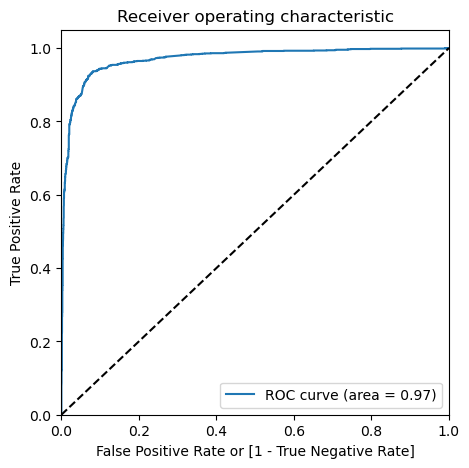

In [195]:
from sklearn import metrics

# Calculate ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate=False)

# Assuming draw_roc is a custom function you've defined for plotting
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [197]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.117913,917,0,1,1,0,0,0,0,0,0,0,0
1,0,0.107395,1487,0,1,1,0,0,0,0,0,0,0,0
2,1,0.987888,7495,1,1,1,1,1,1,1,1,1,1,1
3,0,0.165205,569,0,1,1,0,0,0,0,0,0,0,0
4,1,0.962080,715,1,1,1,1,1,1,1,1,1,1,1


In [198]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.374409     1.000000     0.000000
0.1          0.1  0.798606     0.980053     0.690012
0.2          0.2  0.904904     0.950798     0.877437
0.3          0.3  0.924820     0.934176     0.919220
0.4          0.4  0.927060     0.911569     0.936331
0.5          0.5  0.922081     0.869016     0.953840
0.6          0.6  0.920339     0.839096     0.968961
0.7          0.7  0.912123     0.805851     0.975726
0.8          0.8  0.899427     0.763298     0.980899
0.9          0.9  0.867563     0.665559     0.988460


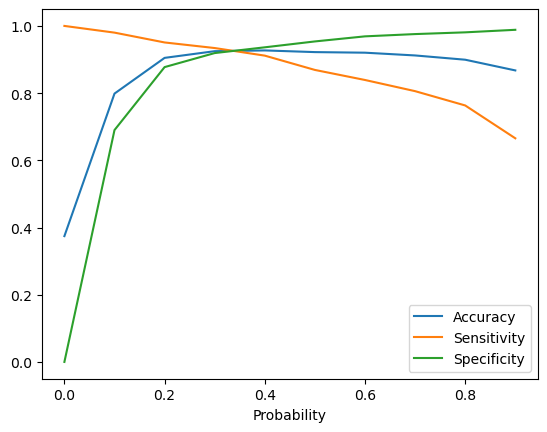

In [199]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

In [200]:
#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.117913,917,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.107395,1487,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.987888,7495,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.165205,569,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.962080,715,1,1,1,1,1,1,1,1,1,1,1,1


### Assigning Lead Score

In [202]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted,Lead_Score
0,0,0.117913,917,0,1,1,0,0,0,0,0,0,0,0,0,12
1,0,0.107395,1487,0,1,1,0,0,0,0,0,0,0,0,0,11
2,1,0.987888,7495,1,1,1,1,1,1,1,1,1,1,1,1,99
3,0,0.165205,569,0,1,1,0,0,0,0,0,0,0,0,0,17
4,1,0.962080,715,1,1,1,1,1,1,1,1,1,1,1,1,96


In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

In [ ]:
# Positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

## Precision and Recall

In [ ]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)
confusion

In [ ]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

In [ ]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

In [ ]:
from sklearn.metrics import precision_score, recall_score

print("Precision Score",precision_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted))
print("Recall Score",recall_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted))

### Precision and recall tradeoff

In [ ]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.Final_Predicted

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [ ]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

In [ ]:
X_test = X_test[col]
X_test.head()

In [ ]:
X_test_sm = sm.add_constant(X_test)

### Making predictions on the test set

In [ ]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

In [ ]:
# Converting y_pred to a dataframe which is an array
y_test_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_test_pred_1.head()

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_test_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_test_pred_final = pd.concat([y_test_df, y_test_pred_1],axis=1)
y_test_pred_final.head()

In [ ]:
# Renaming the column
y_test_pred_final = y_test_pred_final.rename(columns={0: 'Converted_Prob'})

# Rearranging the columns
y_test_pred_final = y_test_pred_final[['Prospect ID', 'Converted', 'Converted_Prob']]

# Let's see the head of y_pred_final
y_test_pred_final.head()


In [ ]:
y_test_pred_final['Final_Predicted'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_test_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Final_Predicted)

In [ ]:
confusion = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Final_Predicted)
confusion

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

In [ ]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

### Precision and recall tradeoff

In [ ]:
from sklearn.metrics import precision_recall_curve
y_test_pred_final.Converted, y_test_pred_final.Final_Predicted

In [ ]:
p, r, thresholds = precision_recall_curve(y_test_pred_final.Converted, y_test_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [ ]:
#### From the curve above, 0.41 is the optimum point to take it as a cutoff probability.
y_test_pred_final['Final_Predicted'] = y_test_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.41 else 0)
y_test_pred_final.head()

In [ ]:
confusion = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Final_Predicted)
confusion

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

In [ ]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

In [ ]:
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Final_Predicted)

### Assigning Lead Score for the test data 

In [ ]:
y_test_pred_final['Lead_Score'] = y_test_pred_final.Converted_Prob.map( lambda x: round(x*100))
y_test_pred_final.head()

<font color= #0000FF>____Conclusion:
It was found that the variables that mattered the most in the potential buyers are (In descending order) :<br>
1.	The total time spend on the Website.<br>
2.	Total number of visits.<br>
3.	When the lead source was: <br>
a.	Google<br>
b.	Direct traffic<br>
c.	Organic search<br>
d.	Welingak website<br>
4.	When the last activity was:<br>
a.	SMS<br>
b.	Olark chat conversation<br>
5.	When the lead origin is Lead add format.<br>
6.	When their current occupation is as a working professional.<br>
Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses____</font>

### THANK YOU